target
0    220
1     83
Name: count, dtype: int64


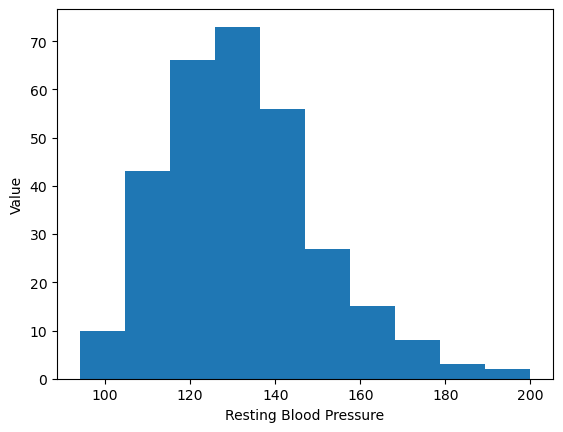

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./heart.csv')
#print(df.head())
#print(df.shape)
#print(df.info())

print(df['target'].value_counts())


plt.hist(df['trestbps'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

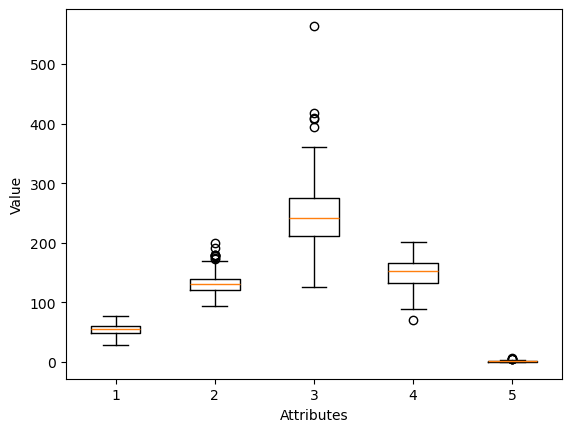

In [10]:
data_to_boxplot = [df['age'], df['trestbps'], df['chol'],
df['thalach'], df['oldpeak']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [11]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [29]:
# 범주형(문자열) 데이터 인코딩
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # 범주형 데이터가 있는 경우
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # 나중에 필요할 경우를 대비해 저장

# training_points에는 'target'을 제외한 모든 열을 저장, training_labels에는 'target' 열을 저장
training_points = df.drop(columns=['target'])
training_labels = df['target']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    training_points,    # 입력 데이터
    training_labels,    # 타겟 레이블
    test_size=0.2,      # 테스트 데이터 비율 30%
    random_state=4      # 재현 가능성을 위해 시드 고정
)

# 학습 및 테스트 데이터의 크기 출력
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (242, 13)
y_train shape: (242,)
X_test shape: (61, 13)
y_test shape: (61,)


In [26]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
[[54  3]
 [26  8]]
0.6813186813186813


[0.7213114754098361, 0.7540983606557377, 0.7377049180327869, 0.7704918032786885, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.6721311475409836, 0.7049180327868853, 0.6557377049180327, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.6721311475409836, 0.6885245901639344, 0.6721311475409836, 0.6885245901639344, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6885245901639344, 0.7049180327868853, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7213114754098361, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.6885245901639344, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7049180327868853, 0.7213114754098361, 0.7049180327868853, 0.7049180327868853, 0.6885245901639344, 0.7049180327868853, 0.6885245901639344]


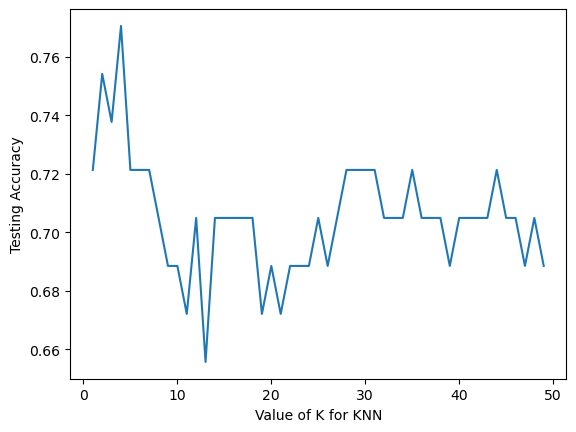

In [30]:
k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()

features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

In [34]:
from sklearn.preprocessing import MinMaxScaler
#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = MinMaxScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
df_model[feature] = scaler.fit_transform(df_model[feature])
training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

In [35]:
from sklearn.preprocessing import RobustScaler
#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']